In [50]:
import mglearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [20]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm
import seaborn as sns

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

In [21]:
SEED = 42

# 앙상블(Ensemble)

> 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

- Bagging: variance를 감소시키는 역할
- Boosting: bias를 감소시키는 역할

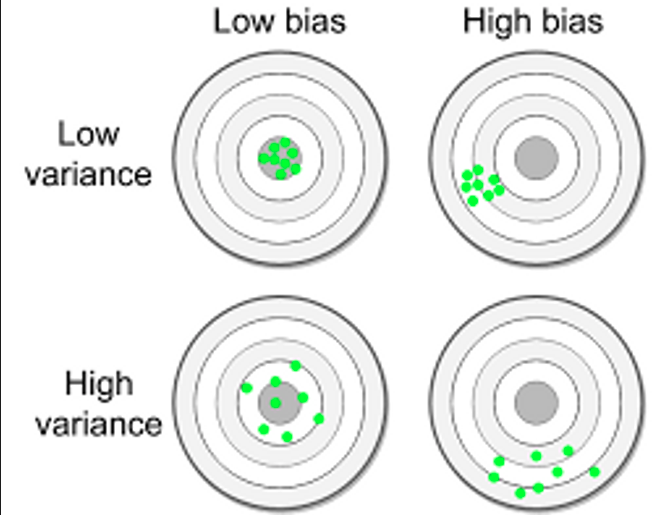

## Bagging

1. 데이터로부터 복원추출을 통해 n개의 bootstrap sample 생성
2. 해당 sample에 대해서 모델 학습
3. 1, 2 과정을 반복한 후 최종 bagging 모델을 정의

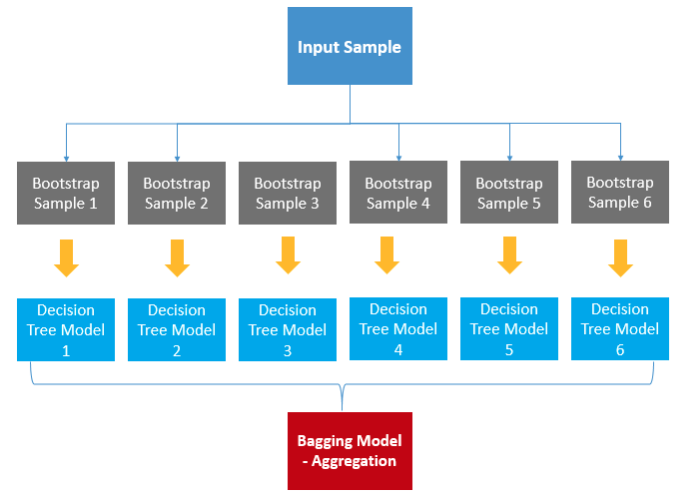

### Random Forest

> Decision Tree의 주요 단점은 훈련 데이터에 overfitting되는 경향이 있다는 것이다.  
> 랜덤 포레스트는 이 문제를 회피하는 방법으로 사용한다

- 랜덤하게 일부 샘플과 일부 feature를 뽑아서 여러 개의 트리를 만들어 앙상블하는 모델

#### 주요 파라미터

- n_estimators: 생성할 트리의 갯수
- max_features: 각 트리가 얼마나 무작위가 될 지를 결정하며, 작을 수록 overfitting을 줄여준다.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [23]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=SEED)
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, stratify=y, random_state=SEED,
)

In [24]:
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_tr, y_tr)

In [25]:
forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1872583848),
 DecisionTreeClassifier(max_features='sqrt', random_state=794921487),
 DecisionTreeClassifier(max_features='sqrt', random_state=111352301),
 DecisionTreeClassifier(max_features='sqrt', random_state=1853453896),
 DecisionTreeClassifier(max_features='sqrt', random_state=213298710)]

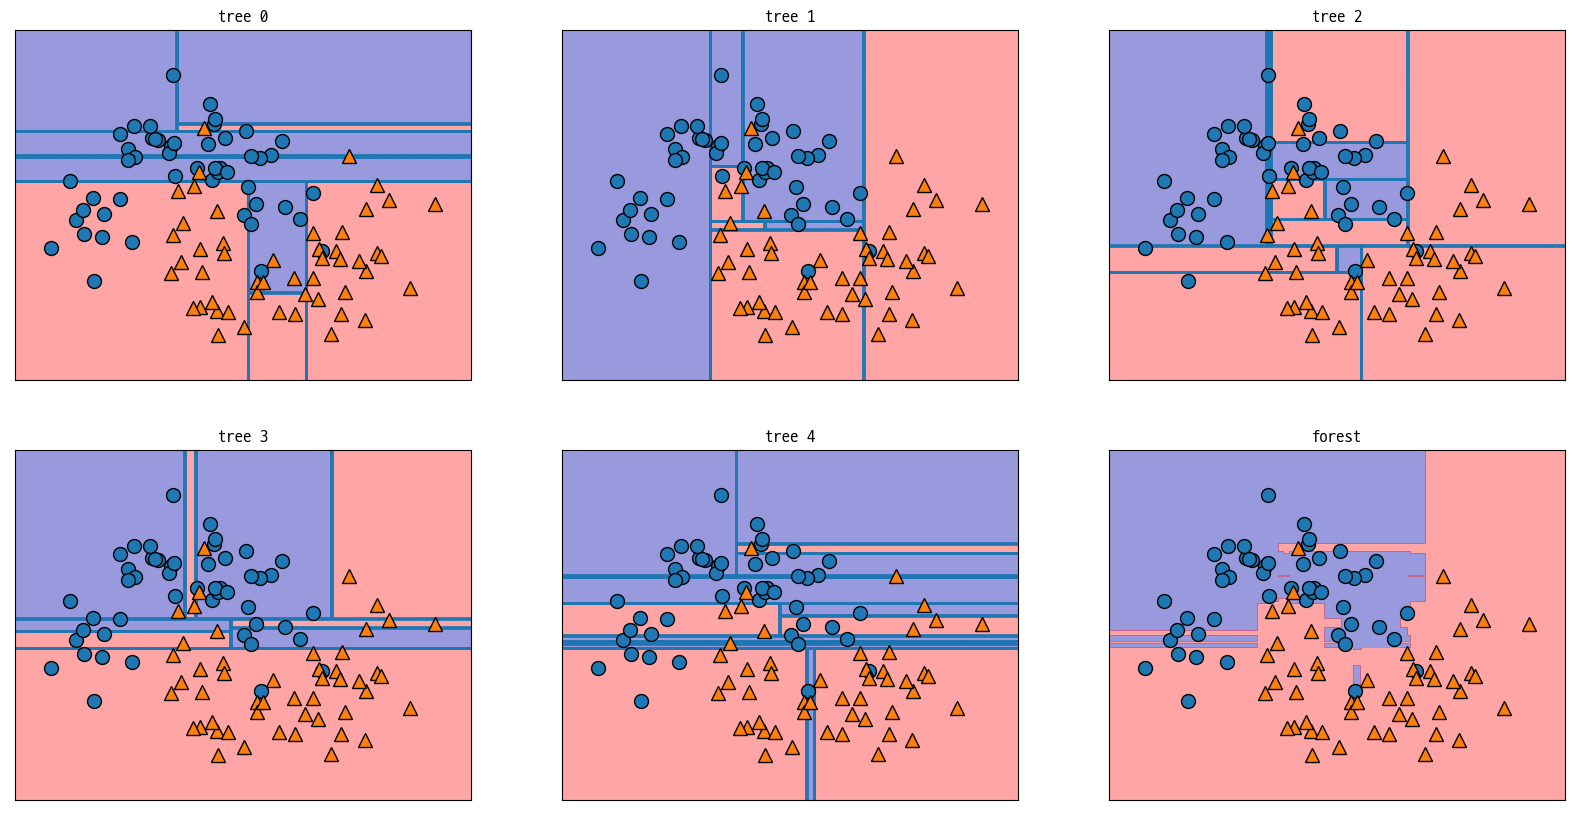

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for idx, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"tree {idx}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("forest")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [28]:
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 0.96 / 테스트용 평가지표: 0.72


In [27]:
from sklearn.datasets import load_breast_cancer

In [29]:
cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=SEED
)

In [30]:
forest = RandomForestClassifier(n_estimators=100, random_state=SEED).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.958041958041958


In [31]:
hp = {
    "random_state" : 0,
    "max_features" : "sqrt", # None 을 줄경우 전체피쳐 사용 
    "n_estimators" : 100, # 트리개수 
    "max_depth" : 10,
    "min_samples_split" : 10,
    "min_samples_leaf" : 3,
}

forest = RandomForestClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 0.9882629107981221 / 테스트용 평가지표: 0.958041958041958


## Boosting

1. weak learner를 생성한 후 error를 계싼
2. error에 기여한 sample마다 다른 가중치를 두고 해당 error를 감소시키는 새로운 모델 학습
3. 1, 2를 반복한 후 최종 boosting 모델을 정의

Bagging과의 차이:  
- Bagging은 한 트리가 랜덤으로 추출한 샘플만을 학습  
Boosting은 한 트리가 한 번에 전체 데이터를 학습
- Bagging은 이어지는 정보 없이 여러 번의 시도  
Boosting은 한 번의 시도 후 결과로 나온 가중치를 다음 시도에 반영

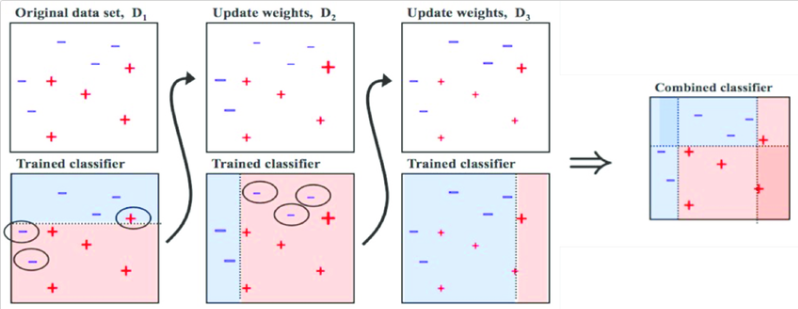

### Gradient Boost

> max_depth가 적은 약한 트리들을 만들어 학습하는 알고리즘

- 트리 기반 부스팅 앙상블 모델
- 머신러닝 알고리즘 중에서 가장 예측 성능이 높다고 알려져 있고 인기있는 알고리즘

#### 주요 파라미터

- max_depth: 1~5로 설정
- n_estimators: 생성할 트리의 갯수
- learning_rate: 얼마나 강하게 보정할지를 정하는 수치

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=SEED
)


In [34]:
gradient = GradientBoostingRegressor(random_state=SEED).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.9954470985502689 / 테스트용 평가지표: 0.8460598376785138


오버피팅이 강하게 된 모습이 보인다. 하이퍼파라미터를 적용해보자.

In [37]:
hp = {
    "random_state": SEED,
    "max_depth": 1,
    "n_estimators": 100
}

gradient = GradientBoostingRegressor(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.8864176486236018 / 테스트용 평가지표: 0.8290914723510502


In [36]:
hp = {
    "random_state": SEED,
    "max_depth": 1,
    "n_estimators": 100,
    "learning_rate": 0.2
}

gradient = GradientBoostingRegressor(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.9030424533281205 / 테스트용 평가지표: 0.8335348874914777


### XGBoost

> GBM(Gradient Boost)를 병렬 학습이 지원되도록 구현한 라이브러리이다. 따라서 GBM보다 학습 속도가 빠르다.

#### 주요 파라미터

- 일반 파라미터
> 부스팅을 수행할 때 트리를 사용할지, 선형 모델을 사용할지 등을 고른다.
- 부스터 파라미터
> 선택한 부스터에 따라 파라미터가 다르다.
- 학습 과정 파라미터
> 학습 시나리오를 결정한다.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,19.890,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,23.73,25.23,160.50,1646.0,0.14170,0.3309,0.4185,0.16130,0.2549,0.09136
1,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,17.140,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,22.25,21.40,152.40,1461.0,0.15450,0.3949,0.3853,0.25500,0.4066,0.10590
3,17.300,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,0.1813,0.05613,...,19.85,25.09,130.90,1222.0,0.14160,0.2405,0.3378,0.18570,0.3138,0.08113
4,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,27.66,25.80,195.00,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.13010,0.3299,0.3630,0.12260,0.3175,0.09772
422,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.14950,0.4116,0.6121,0.19800,0.2968,0.09929
423,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.17320,0.4967,0.5911,0.21630,0.3013,0.10670
424,17.050,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,0.2131,0.06325,...,19.59,24.89,133.50,1189.0,0.17030,0.3934,0.5018,0.25430,0.3109,0.09061


In [38]:
from xgboost import XGBClassifier, plot_importance

hp = {
    "random_state": SEED
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.965034965034965


overfitting 방지를 위해 조정해야 하는 것
- n_estimators 높이기
- min_child_weight 높이기
- learning_rate 낮추기
- max_depth 낮추기
- gamma 높이기

In [55]:
hp = {
    "random_state" : SEED,
    "max_depth" : 2,
    "n_estimators" : 200, # 수행할 부스팅 단계 수
    "learning_rate": 0.01,
    "min_child_weight": 2,
    "gamma": 1
}

xgb = XGBClassifier(**hp).fit(pd.DataFrame(X_tr, columns=cancer.feature_names), y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')

훈련용 평가지표: 0.9812206572769953 / 테스트용 평가지표: 0.951048951048951


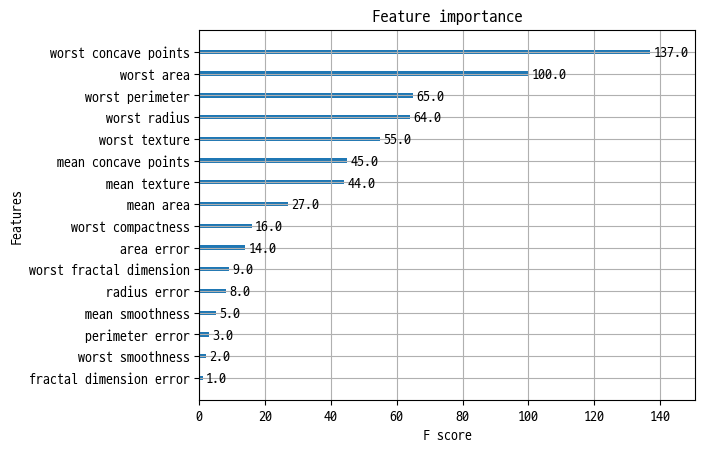

In [56]:
plot_importance(xgb)
plt.show()